<a href="https://colab.research.google.com/github/jelenapetroviic/Age_Gender_Emotion_Detection/blob/main/age_gender_emotion_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Principi prezentacije i prepoznavanja oblika 2024/2025** <br>

**Jelena Petrović IT34-2021** <br>
**Tema projekta:** Detekcija godina, pola i emocija  <br> <br> <br>
# **Sadržaj**
1. Uvod
2. Teorijski dio
3. Analiza dataset-a
4. Praktični dio
5. Zaključak
6. Literatura <br> <br> <br>
# **Uvod**
Cilj projekta je razvoj modela koji može da prepozna starosne grupe, pol i emocije ljudi na slikama. <br>
Za implementaciju je izabran model **MobileNetV2** u okviru transfer learning pristupa. <br>
MobileNetV2 model je već unaprijed treniran na velikom skupu slika (ImageNet), što omogućava bržu i efikasniju obuku na malom dataset-u, kao što je ovaj projekat.  

Kroz projekat ćemo obuhvatiti sledeće korake:  
- pregled i analiza dataset-a,  
- priprema podataka i treniranje modela,  
- evaluacija performansi i vizualizacija rezultata,  
- testiranje modela na pojedinačnim slikama.  

Na taj način ćemo demonstrirati kako se metode dubokog učenja mogu primijeniti čak i na manjim dataset-ovima i kakve rezultate je moguće postići transfer learning pristupom. <br> <br> <br>
# **Teorijski dio**
**Duboko učenje (Deep Learning)** je dio mašinskog učenja koji koristi višeslojne neuronske mreže da automatski prepoznaju složene obrasce u podacima. Posebno je korisno kada radimo sa slikama ili zvukom, jer klasične metode često ne mogu dovoljno dobro da izdvoje važne osobine.  
Konvolucione neuronske mreže (CNN), koje koristimo u ovom projektu, su tip duboke mreže posebno dizajniran za slike i jedan su od najčešće korišćenih modela u računarskom vidu. <br>
**Prepoznavanje oblika** je proces u kojem računar analizira podatke kako bi identifikovao obrasce i karakteristike koje omogućavaju razlikovanje jedne klase od druge. U kontekstu ovog projekta, to znači da računar uči vizuelne osobine koje odvajaju starosne grupe, pol i emocije ljudi na slikama.  
Ovaj proces je ključan za mnoge primjene računarskog vida, uključujući sigurnost, interakciju čovek-računar, socijalna istraživanja i personalizovane aplikacije u marketingu. <br>
Da bi se efikasno izdvojile relevantne karakteristike sa slika, koriste se **konvolucione neuronske mreže (CNN)**. CNN je tip duboke neuronske mreže posebno dizajniran za obradu vizuelnih podataka. Osnovna ideja CNN-a je automatsko učenje filtera koji prepoznaju karakteristične osobine slika, kao što su ivice, oblici ili teksture, a zatim ih kombinuju na višim slojevima kako bi klasifikovali slike prema zadatim kategorijama.  
Glavna prednost CNN-a je što omogućava automatsko ekstraktovanje karakteristika, bez potrebe za ručnim definisanjem pravila, što značajno smanjuje kompleksnost procesa i omogućava bolju generalizaciju na nepoznatim podacima. <br>
Za ovaj projekat primenjujemo pristup **transfer learning-a** koristeći model **MobileNetV2**. Transfer learning podrazumijeva korišćenje već treniranog modela i njegovo prilagođavanje za novi zadatak. MobileNetV2 je prethodno treniran na velikom ImageNet dataset-u, što znači da već posjeduje sposobnost prepoznavanja osnovnih vizuelnih karakteristika poput oblika, boja i tekstura.

Prednosti ovog pristupa su višestruke:
- **Brže treniranje** – model ne mora učiti sve karakteristike od nule, što je posebno korisno kod malih dataset-ova.  
- **Bolje performanse** – model već zna opšte vizuelne osobine, što omogućava preciznije klasifikacije novih slika.  
- **Manja potreba za resursima**   

**MobileNetV2** je posebno pogodan za ovakve zadatke jer kombinuje efikasnu arhitekturu sa relativno malim brojem parametara, a i dalje postiže visoku tačnost. Njegova struktura koristi tzv. "inverted residual blocks" i linear bottleneck slojeve, što omogućava da se informacije efikasno prenose kroz mrežu, smanjujući broj potrebnih računskih operacija. <br> <br> <br>
# **Anliza dataset-a**
Za rad će biti korišćen set podataka koji je preuzet sa sledećeg linka: <br>
[Age_Detection.zip](https://) <br>
Dataset se sastoji od slika ljudi raspoređenih u dva glavna foldera: `train` i `test`.  <br>
Svaki od foldera sadrži 5 podfoldera koji predstavljaju starosne grupe:  
- 18-20  
- 21-30  
- 31-40  
- 41-50  
- 51-60

Pored originalnog CSV fajla sa kolonama `file`, `age` i `split`, dodatno su uključene kolone:  
- `gender` – pol osobe (`male` ili `female`)  
- `emotions` – emocija osobe (sve slike imaju vrijednost `neutral`).  

Dataset sadrži ukupno 150 slika, od čega 125 pripada train skupu, a 25 test skupu.  
Ova podjela omogućava da model bude treniran na većini podataka i testiran na manjem, nezavisnom skupu slika. <br> <br> <br>
# **Praktični dio**
U ovoj sekciji ćemo prikazati glavni dio projekta, gdje se prolazi kroz sve korake: od pripreme i analize dataset-a, preko treniranja modela, pa sve do evaluacije i vizualizacije rezultata. <br>
# Uvoz biblioteka i priprema okruženja
Prvi korak u praktičnom dijelu projekta je uvoz svih potrebnih biblioteka i modula.  

- `os` – rad sa fajl sistemom, navigacija kroz foldere i fajlove.  
- `pandas` i `numpy` – obrada podataka, učitavanje CSV fajla, manipulacija tabelarnim podacima.  
- `tensorflow` i moduli iz `keras` – kreiranje i treniranje neuronskih mreža, definisanje slojeva i optimizatora.  
- `matplotlib.pyplot` – vizualizacija rezultata i analiza podataka.  
- `sklearn.preprocessing.LabelEncoder` – pretvaranje kategorijskih vrijednosti u numeričke, što je potrebno za klasifikaciju.  
- `to_categorical` – konvertuje numeričke oznake u one-hot encoding, što je standard za klasifikaciju sa više klasa.








In [2]:
import os
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

Ovaj korak je neophodan da bismo kasnije mogli učitavati slike, pripremati dataset i definisati model za predikciju starosnih grupa, pola i emocija. <br>
# Povezivanje sa Google Drive-om
Zatim je izvršeno montiranje Google Drive-a, kako bi moglo da se pristupi dataset-u koji je smješten u Google Drive folderu. Ovo omogućava Colab okruženju da učita slike i CSV fajl direktno sa Drive-a.

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Nakon izvršavanja ovog koraka, pojaviće se link i polje za autorizaciju, gdje je potrebno dozvoliti pristup Drive-u kako bi Colab mogao da čita fajlove. <br>
# Učitavanje CSV fajla i priprema putanja do slika
Nakon povezivanja sa Google Drive-om, sledeći korak je učitavanje CSV fajla koji sadrži informacije o slikama.  
CSV fajl uključuje kolone `file` (putanja do slike), `age` (starosna grupa), `split` (train/test), kao i dodatne kolone `gender` i `emotions`.  

Kako bi slike bile dostupne za obradu u Colab-u, dodajemo punu putanju do svake slike kombinujući osnovni direktorijum (`base_dir`) sa relativnom putanjom koja je navedena u CSV fajlu.  
Na ovaj način možemo direktno koristiti kolonu `file` za učitavanje slika u dataset.

In [4]:
base_dir = "/content/drive/MyDrive/Age_Detection/"
csv_path = base_dir + "age_gender_emotions_detection.csv"

df = pd.read_csv(csv_path)
df['file'] = base_dir + df['file']

Nakon izvršavanja ovog koraka, `df` sadrži sve podatke iz CSV-a, a kolona `file` sada pokazuje na tačnu lokaciju svake slike. <br>
# Dodavanje varijacije u koloni `emotions`
U dataset-u sve slike imaju istu vrijednost u koloni `emotions` (`neutral`), što može otežati treniranje modela za klasifikaciju emocija, jer ne postoje različite klase.  
Da bismo simulirali malu varijaciju i omogućili modelu da prepozna više kategorija, mijenja se nasumično 10% vrijednosti u koloni `emotions` u `"other"`.

In [5]:
if df['emotions'].nunique() == 1:
    df.loc[df.sample(frac=0.1).index, 'emotions'] = "other"

# Enkodiranje kategorija i priprema podataka za treniranje

Prije nego što podatke proslijedimo modelu, potrebno je da sve kategorijske kolone pretvorimo u numerički oblik koji model može da razumije.  

1. **Starosne grupe (`age`)**  
   - Koristimo `LabelEncoder` da svakoj starosnoj grupi dodijelimo jedinstveni broj.  
   - Zatim kreiramo **one-hot encoding** (`age_cat`), gdje se svaka starosna grupa predstavlja kao niz sa jednom jedinicom na mjestu odgovarajuće klase, a nule na ostalim mjestima. Ovaj format je standardan za klasifikaciju sa više klasa.  
   - `age_classes` bilježi ukupan broj starosnih grupa, što je potrebno za definisanje izlaznog sloja modela.

2. **Pol (`gender`)**  
   - Pol je binarna kategorija, pa mapiramo `male` → 0 i `female` → 1.  

3. **Emocije (`emotions`)**  
   - Koristimo `LabelEncoder` da pretvorimo tekstualne oznake (`neutral`, `other`) u numeričke vrijednosti.  
   - Kreiramo **one-hot encoding** (`emotions_cat`) kako bi model mogao da klasifikuje više klasa emocija.  
   - `emotion_classes` bilježi ukupan broj različitih emocija.

In [6]:
age_encoder = LabelEncoder()
df['age'] = age_encoder.fit_transform(df['age'])
age_classes = df['age'].nunique()
df['age_cat'] = df['age'].apply(lambda x: to_categorical(x, num_classes=age_classes))

df['gender'] = df['gender'].map({'male':0, 'female':1})

emotion_encoder = LabelEncoder()
df['emotions'] = emotion_encoder.fit_transform(df['emotions'])
emotion_classes = df['emotions'].nunique()
df['emotions_cat'] = df['emotions'].apply(lambda x: to_categorical(x, num_classes=emotion_classes))

Nakon ovog koraka, sve kategorijske kolone su spremne za treniranje modela, a izlazni podaci su u formatu koji omogućava modelu da pravilno uči i razlikuje klase. <br>
# Pregled prvih redova dataset-a
Kako bismo se uvjerili da su sve transformacije uspješno odrađene, koristimo komandu `df.head()` da prikažemo prvih nekoliko redova dataseta.  
Na ovaj način provjeravamo:  
- da li su kolone korektno učitane,  
- da li su kategorije (pol, godine, emocije) uspješno konvertovane u numeričke vrijednosti,  
- i da li dodatne kolone (`age_cat`, `emotions_cat`) ispravno prikazuju one-hot vektore.

In [7]:
print("Prikaz prvih par redova:")
print(df.head())

Prikaz prvih par redova:
                                                file  age  split  gender  \
0  /content/drive/MyDrive/Age_Detection/train/18-...    0  train       1   
1  /content/drive/MyDrive/Age_Detection/train/18-...    0  train       1   
2  /content/drive/MyDrive/Age_Detection/train/18-...    0  train       0   
3  /content/drive/MyDrive/Age_Detection/train/18-...    0  train       0   
4  /content/drive/MyDrive/Age_Detection/train/18-...    0  train       0   

   emotions                    age_cat emotions_cat  
0         0  [1.0, 0.0, 0.0, 0.0, 0.0]   [1.0, 0.0]  
1         0  [1.0, 0.0, 0.0, 0.0, 0.0]   [1.0, 0.0]  
2         0  [1.0, 0.0, 0.0, 0.0, 0.0]   [1.0, 0.0]  
3         0  [1.0, 0.0, 0.0, 0.0, 0.0]   [1.0, 0.0]  
4         0  [1.0, 0.0, 0.0, 0.0, 0.0]   [1.0, 0.0]  


#  Priprema slika za model

Kako neuronska mreža očekuje ulaz u određenom formatu, neophodno je izvršiti nekoliko koraka pripreme:

1. **Definisanje dimenzije slike** – sve slike se skaliraju na dimenziju `128x128` piksela (`IMG_SIZE = (128,128)`).  
   Ovo osigurava konzistentnost, jer slike iz dataseta mogu biti različitih veličina.  

2. **Funkcija `load_image()`**  
   - Učitava sliku sa zadate putanje (`tf.io.read_file`).  
   - Dekodira je u RGB format sa 3 kanala (`tf.image.decode_jpeg`).  
   - Mijenja dimenziju na zadatu (`tf.image.resize`).  
   - Normalizuje vrijednosti piksela dijeljenjem sa 255.0, tako da svi pikseli budu u opsegu `[0,1]`.  

In [8]:
IMG_SIZE = (128,128)

def load_image(path):
    img = tf.io.read_file(path)
    img = tf.image.decode_jpeg(img, channels=3)
    img = tf.image.resize(img, IMG_SIZE)
    img = img / 255.0
    return img

# Kreiranje `train` i `test` dataset-a
Kako bismo obezbijedili da podaci budu spremni za treniranje i evaluaciju modela, potrebno je da ih organizujemo u format koji je efikasan za rad u TensorFlow-u.  
Za to definišemo funkciju **`make_dataset()`** koja od podataka iz DataFrame-a pravi optimizovani `tf.data.Dataset`.

Koraci u ovoj funkciji su sledeći:

1. **Ekstrakcija podataka iz DataFrame-a**  
   - `files` – putanje do slika,  
   - `ages` – starosne grupe u one-hot formatu,  
   - `genders` – vrijednosti za pol (0 ili 1),  
   - `emotions` – emocije u one-hot formatu.  

2. **Kreiranje TensorFlow dataset-a**  
   - Pomoću `tf.data.Dataset.from_tensor_slices()` pravimo dataset od navedenih podataka.  

3. **Funkcija `map_fn()`**  
   - Za svaku putanju slike koristi `load_image()` kako bi je učitala i obradila.  
   - Vraća tuple sa slikom i odgovarajućim labelama (`age`, `gender`, `emotions`).  

4. **Optimizacija dataset-a**  
   - `shuffle(buffer_size=100)` miješa uzorke radi veće raznovrsnosti (osim kada radimo testiranje).  
   - `batch(batch_size)` grupiše slike u mini-batcheve, što ubrzava treniranje.  
   - `prefetch(tf.data.AUTOTUNE)` unaprijed priprema podatke dok se model trenira.  

Na kraju se kreiraju dva posebna skupa:  
- **`train_ds`** – koristi se za treniranje modela, sa uključenim miješanjem podataka,  
- **`test_ds`** – koristi se za evaluaciju modela, bez miješanja (fiksni redosled).

In [9]:
def make_dataset(df_subset, batch_size=32, shuffle=True):
    files = df_subset['file'].values
    ages = np.stack(df_subset['age_cat'].values)
    genders = df_subset['gender'].values
    emotions = np.stack(df_subset['emotions_cat'].values)

    dataset = tf.data.Dataset.from_tensor_slices((files, ages, genders, emotions))

    def map_fn(file, age, gender, emo):
        img = load_image(file)
        return img, {"age": age, "gender": gender, "emotions": emo}

    dataset = dataset.map(map_fn, num_parallel_calls=tf.data.AUTOTUNE)
    if shuffle:
        dataset = dataset.shuffle(buffer_size=100)
    dataset = dataset.batch(batch_size).prefetch(tf.data.AUTOTUNE)
    return dataset

train_ds = make_dataset(df[df['split']=='train'])
test_ds = make_dataset(df[df['split']=='test'], shuffle=False)

# Kreiranje modela
Sledeći dio koda učitava unaprijed trenirani model **MobileNetV2** koji je treniran na velikom skupu slika (ImageNet).

- `include_top=False` znači da ne koristimo originalni klasifikacioni sloj, jer ćemo dodati naše izlaze za starosne grupe, pol i emocije.
    
- `trainable=False` znači da ne treniramo bazni model od početka, već ga koristimo kao **model koji izvlači bitne osobine iz slika**, čime značajno ubrzavamo treniranje i smanjujemo potrebu za velikim dataset-om.

In [10]:
base_model = MobileNetV2(weights='imagenet', include_top=False, input_tensor=Input(shape=(128,128,3)))
base_model.trainable = False

/tmp/ipython-input-3044186585.py:1: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(weights='imagenet', include_top=False, input_tensor=Input(shape=(128,128,3)))


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Nakon baznog modela, dodajemo dodatne slojeve koji pripremaju podatke za konačne izlaze:

- **GlobalAveragePooling2D**: pretvara višedimenzionalni izlaz iz baznog modela u kompaktnu numeričku reprezentaciju (niz vrijednosti) koja sažima najvažnije osobine slike.  
- **Dropout (0.3)**: služi za regularizaciju i sprječava pretreniranje modela tako što nasumično "gasi" 30% neurona tokom treniranja.

In [11]:
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.3)(x)


Sledeći dio definiše tri odvojena izlaza modela, jer želimo da naš model istovremeno predviđa više stvari:

- **age_output** – klasifikacija starosnih grupa. Koristimo `softmax` aktivaciju jer starosne grupe predstavljaju više kategorija.  
- **gender_output** – binarna klasifikacija pola (muško/žensko). Koristimo `sigmoid` aktivaciju jer postoje samo dvije mogućnosti.  
- **emotion_output** – klasifikacija emocija. Koristimo `softmax` jer emocije takođe predstavljaju više kategorija.  

Na ovaj način dobijamo **model sa više izlaza** (multi-task model) koji istovremeno rješava sve zadatke.



In [12]:
age_output = Dense(age_classes, activation='softmax', name='age')(x)
gender_output = Dense(1, activation='sigmoid', name='gender')(x)
emotion_output = Dense(emotion_classes, activation='softmax', name='emotions')(x)

Naredna linija kreira **kompletan model** tako što definiše ulaz i izlaze:  

- **inputs** – ulaz je isti kao kod baznog modela (`base_model.input`), tj. slike veličine 128x128x3.  
- **outputs** – izlazi su naši tri sloja: starosne grupe (`age_output`), pol (`gender_output`) i emocije (`emotion_output`).

In [13]:
model = Model(inputs=base_model.input, outputs=[age_output, gender_output, emotion_output])

Kompilacija modela je korak u kojem definišemo **način učenja modela**:

- **optimizer**: koristimo **Adam** optimizer sa malom stopom učenja (`0.0001`) jer je efikasan i prilagođava težine automatski tokom treniranja.  
- **loss (gubitak)**: za svaki izlaz biramo odgovarajući tip funkcije gubitka:  
  - `categorical_crossentropy` → za starosne grupe i emocije (više kategorija),  
  - `binary_crossentropy` → za pol (dvije kategorije).  
- **metrics (metrike)**: pratimo **tačnost (accuracy)** za svaki od izlaza kako bismo mogli da ocijenimo performanse modela po kategorijama.

In [14]:
model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss={'age':'categorical_crossentropy', 'gender':'binary_crossentropy', 'emotions':'categorical_crossentropy'},
    metrics={'age':'accuracy', 'gender':'accuracy', 'emotions':'accuracy'}
)

Funkcija `model.summary()` prikazuje pregled kompletne arhitekture modela:

- prikazuje sve slojeve modela i njihov tip,  
- broj parametara u svakom sloju,  
- ukupan broj parametara modela (uključujući trenabilne i netrenabilne),  
- kako su povezani ulazi i izlazi.

Ovo je korisno za brzu verifikaciju da li je model pravilno definisan pre početka treniranja.

In [15]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 128, 128,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 64, 64,    │        864 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 64, 64,    │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 64, 64,    │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 64, 64,    │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 64, 64,    │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 64, 64,    │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 64, 64,    │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 64, 64,    │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 64, 64,    │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 64, 64,    │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 64, 64,    │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 65, 65,    │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 32, 32,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 32, 32,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 32, 32,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 32, 32,    │      2,304 │ block_1_depthwis

 Total params: 2,268,232 (8.65 MB)

 Trainable params: 10,248 (40.03 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

# Treniranje modela
U ovom koraku model se trenira koristeći **train dataset** i prati se njegov rad na **test dataset-u** radi validacije:

- **train_ds** – skup podataka koji se koristi za učenje modela. Model prolazi kroz sve slike i uči obrasce povezane sa starosnim grupama, polom i emocijama.  
- **validation_data=test_ds** – podaci koji se ne koriste za treniranje, već služe da pratimo kako model generalizuje na nove, neviđene podatke. Ovo je važno kako bismo uočili eventualno **pretreniranje (overfitting)**.  
- **epochs=10** – broj cjelokupnih prolaza kroz cijeli trening dataset. Svaka epoha omogućava modelu da unaprijedi svoje težine na osnovu grešaka iz prethodnog prolaza.  

Rezultat treniranja se čuva u promjenljivoj `history`, koja sadrži detaljne informacije o:  
- funkcijama gubitka (loss) za svaki izlaz,  
- tačnosti (accuracy) za svaki izlaz,  
- ponašanju modela tokom epoha za trening i validaciju.  

In [16]:
history = model.fit(train_ds, epochs=10, validation_data=test_ds)

Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 52s 5s/step - age_accuracy: 0.2468 - age_loss: 2.6841 - emotions_accuracy: 0.6306 - emotions_loss: 0.7977 - gender_accuracy: 0.4618 - gender_loss: 0.9872 - loss: 4.4657 - val_age_accuracy: 0.0800 - val_age_loss: 2.4196 - val_emotions_accuracy: 0.7600 - val_emotions_loss: 0.6465 - val_gender_accuracy: 0.3200 - val_gender_loss: 0.9456 - val_loss: 4.0117
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - age_accuracy: 0.2557 - age_loss: 2.5750 - emotions_accuracy: 0.6353 - emotions_loss: 0.8179 - gender_accuracy: 0.5121 - gender_loss: 0.9442 - loss: 4.3400 - val_age_accuracy: 0.0800 - val_age_loss: 2.3231 - val_emotions_accuracy: 0.8400 - val_emotions_loss: 0.5249 - val_gender_accuracy: 0.3600 - val_gender_loss: 0.9170 - val_loss: 3.7651
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 14s 1s/step - age_accuracy: 0.2557 - age_loss: 2.6106 - emotions_accuracy: 0.7321 - emotions_loss: 0.6504 - gender_accuracy: 0.4976 - gender_loss: 0.8747 - loss: 4.1374 - val_age_accur

# Evaluacija modela

Nakon treniranja, sledeći korak je **evaluacija performansi modela** na test dataset-u, kako bismo vidjeli koliko dobro model generalizuje na neviđene podatke.  

- **model.evaluate(test_ds)** – računa funkciju gubitka (loss) i metrike (accuracy) za svaki izlaz modela na test podacima.  
- **loss_names** – imena svih metrika i funkcija gubitka koje model koristi, kako bismo mogli da ih pravilno prikažemo.  

U ovom koraku se posebno ističu:  
- **Tačnost po kategorijama** – starosne grupe, pol i emocije.  
- **Funkcija gubitka po kategorijama** – pokazuje koliko model griješi za svaki zadatak.  


In [17]:
eval_results = model.evaluate(test_ds)
loss_names = model.metrics_names

print("\n Rezultati evaluacije po kategorijama:")
for name, value in zip(loss_names, eval_results):
    if "accuracy" in name:
        print(f"Tačnost za {name}: {value*100:.2f}%")
    elif "loss" in name and name not in ['loss']:
        print(f"Gubitak za {name}: {value:.4f}")


print("\n Konačan rezime tačnosti (u procentima):")
print(f"Tačnost za STAROSNE GRUPE: {eval_results[4]*100:.2f}%")
print(f"Tačnost za POL: {eval_results[5]*100:.2f}%")
print(f"Tačnost za EMOCIJE: {eval_results[6]*100:.2f}%")

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - age_accuracy: 0.2400 - age_loss: 2.1471 - emotions_accuracy: 0.9200 - emotions_loss: 0.4408 - gender_accuracy: 0.5200 - gender_loss: 0.8502 - loss: 3.4381

 Rezultati evaluacije po kategorijama:
Gubitak za age_loss: 0.8502
Gubitak za gender_loss: 0.4408
Gubitak za emotions_loss: 0.2400

 Konačan rezime tačnosti (u procentima):
Tačnost za STAROSNE GRUPE: 24.00%
Tačnost za POL: 92.00%
Tačnost za EMOCIJE: 52.00%


Na kraju, dobijamo **konkretan rezime tačnosti** u procentima za sve tri kategorije. <br>
# Prikaz rezultata treniranja po epohama
Nakon treniranja, kreiramo **DataFrame** iz objekta `history`, koji sadrži detaljne podatke o toku treniranja:

- **history.history** – sadrži vrijednosti funkcije gubitka (loss) i tačnosti (accuracy) za svaki izlaz modela, i to za svaku epohu, kako na treningu, tako i na validaciji.  
- **pd.DataFrame** – pretvara ove podatke u preglednu tabelu, što olakšava pregled i analizu.  
- **display(results)** – prikazuje tabelu sa rezultatima.  


In [18]:
results = pd.DataFrame(history.history)
print("Rezultati treninga po epohama:")
display(results)

Rezultati treninga po epohama:


,age_accuracy,age_loss,emotions_accuracy,emotions_loss,gender_accuracy,gender_loss,loss,val_age_accuracy,val_age_loss,val_emotions_accuracy,val_emotions_loss,val_gender_accuracy,val_gender_loss,val_loss
0,0.216,2.733109,0.592,0.872864,0.480,0.956810,4.554300,0.08,2.419593,0.76,0.646460,0.32,0.945614,4.011667
1,0.272,2.464758,0.656,0.736133,0.512,0.935234,4.143116,0.08,2.323121,0.84,0.524933,0.36,0.917043,3.765097
2,0.272,2.595769,0.752,0.605416,0.520,0.812671,4.018035,0.16,2.256394,0.96,0.460332,0.48,0.898966,3.615692
3,0.240,2.540789,0.792,0.505061,0.496,0.923165,3.968495,0.16,2.216171,0.96,0.432174,0.48,0.888134,3.536480
4,0.280,2.442998,0.784,0.487177,0.568,0.821047,3.772967,0.16,2.194138,0.92,0.424949,0.44,0.880954,3.500041
5,0.256,2.335472,0.848,0.465910,0.448,1.018258,3.806742,0.20,2.180979,0.92,0.427234,0.48,0.875407,3.483621
6,0.256,2.189332,0.872,0.503900,0.520,0.905616,3.582599,0.20,2.172971,0.92,0.432326,0.52,0.869431,3.474728
7,0.208,2.508262,0.848,0.496279,0.488,0.911888,3.907374,0.28,2.165553,0.92,0.436173,0.52,0.862353,3.464079
8,0.304,2.285541,0.832,0.494322,0.472,0.864501,3.634499,0.28,2.156812,0.92,0.438536,0.52,0.855799,3.451147
9,0.248,2.274165,0.840,0.501655,0.584,0.851242,3.621436,0.24,2.147140,0.92,0.440814,0.52,0.850183,3.438138


# Grafik tačnosti

Graf prikazuje kako se **tačnost modela mijenja tokom treniranja** za svaki od izlaza:

- **Starosne grupe (age)** – linije za trening i validaciju pokazuju koliko dobro model predviđa starosne grupe kroz epohe.  
- **Pol (gender)** – linije za trening i validaciju pokazuju performanse binarne klasifikacije pola.  
- **Emocije (emotions)** – linije za trening i validaciju prikazuju tačnost klasifikacije emocija.  

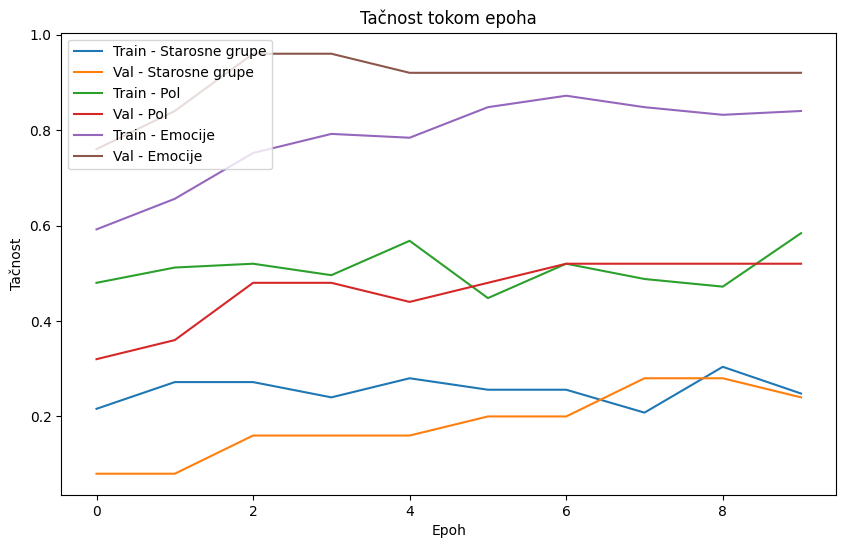

In [19]:
plt.figure(figsize=(10,6))
plt.plot(history.history['age_accuracy'], label='Train - Starosne grupe')
plt.plot(history.history['val_age_accuracy'], label='Val - Starosne grupe')
plt.plot(history.history['gender_accuracy'], label='Train - Pol')
plt.plot(history.history['val_gender_accuracy'], label='Val - Pol')
plt.plot(history.history['emotions_accuracy'], label='Train - Emocije')
plt.plot(history.history['val_emotions_accuracy'], label='Val - Emocije')
plt.title('Tačnost tokom epoha')
plt.xlabel('Epoh')
plt.ylabel('Tačnost')
plt.legend()
plt.show()

Ovaj graf pomaže da se identifikuju sledeće stvari u učenju modela:  
- da li model konstantno poboljšava tačnost,  
- da li dolazi do pretreniranja (ako linije treninga i validacije značajno odstupaju),  
- i u kojim epohama model postiže najbolju generalizaciju. <br>
# Grafik gubitka
Na isti način urađen je i grafik gubitka.

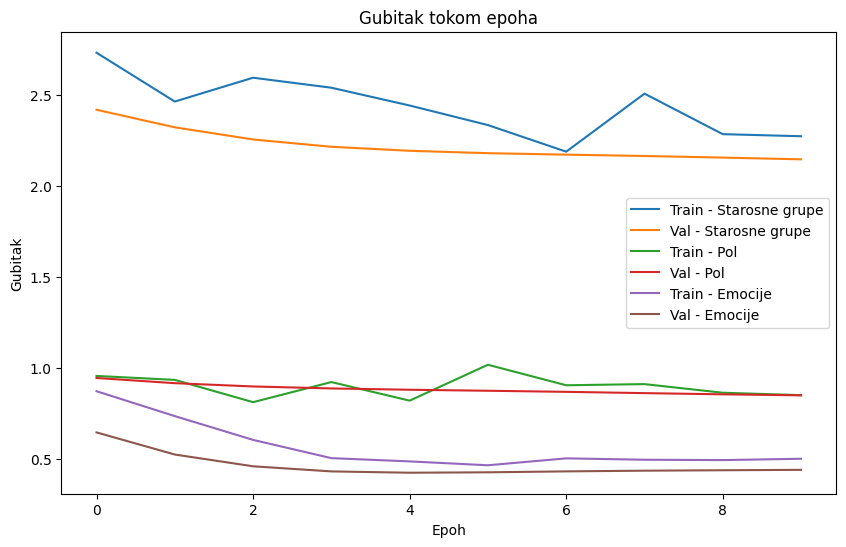

In [20]:
plt.figure(figsize=(10,6))
plt.plot(history.history['age_loss'], label='Train - Starosne grupe')
plt.plot(history.history['val_age_loss'], label='Val - Starosne grupe')
plt.plot(history.history['gender_loss'], label='Train - Pol')
plt.plot(history.history['val_gender_loss'], label='Val - Pol')
plt.plot(history.history['emotions_loss'], label='Train - Emocije')
plt.plot(history.history['val_emotions_loss'], label='Val - Emocije')
plt.title('Gubitak tokom epoha')
plt.xlabel('Epoh')
plt.ylabel('Gubitak')
plt.legend()
plt.show()

# Bar chart (tačnost po kategorijama)

Koristimo **bar chart** da bi vizuelno jasno bilo vidljivo koje kategorije model predviđa bolje, a gdje ima prostora za poboljšanje.  
- Vrijednosti tačnosti su prikazane i numerički iznad svake trake, što olakšava interpretaciju.  
- Boje traka pomažu da se razlikuju kategorije na prvi pogled.  

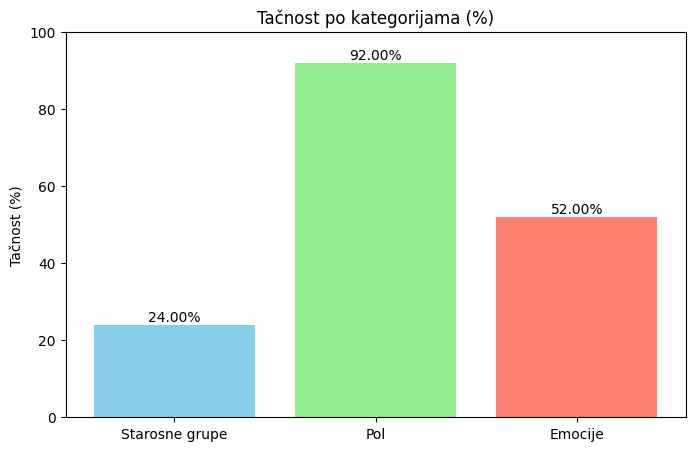

In [21]:
categories = ['Starosne grupe', 'Pol', 'Emocije']
accuracy = [eval_results[4]*100, eval_results[5]*100, eval_results[6]*100]

plt.figure(figsize=(8,5))
plt.bar(categories, accuracy, color=['skyblue','lightgreen','salmon'])
plt.ylim(0,100)
plt.title('Tačnost po kategorijama (%)')
plt.ylabel('Tačnost (%)')
for i, v in enumerate(accuracy):
    plt.text(i, v+1, f"{v:.2f}%", ha='center')
plt.show()

# Predikcija pojedinačnih slika

U ovom dijelu kreiramo funkciju `predict_single_image_readable` koja omogućava da model napravi predikciju za pojedinačne slike i da rezultate prikaže na jasan i čitljiv način. Funkcija obuhvata sledeće korake:

1. **Učitavanje i priprema slike**  
   - Funkcija koristi `image.load_img` da učita sliku sa zadate putanje (`img_path`).  
   - Slika se prilagođava veličini koju model očekuje (`target_size=(128,128)`).  
   - Nakon toga se konvertuje u numerički niz (`image.img_to_array`) i normalizuje dijeljenjem sa 255.0, što omogućava da sve vrijednosti piksela budu u opsegu [0,1], što je standardna praksa kod dubokih mreža.

2. **Dodavanje batch dimenzije**  
   - Model očekuje ulaz u obliku batch-a, čak i kada je u pitanju jedna slika.  
   - Koristimo `np.expand_dims` da dodamo dimenziju batch-a, čime dobijamo oblik `(1, 128, 128, 3)`.

3. **Predikcija modela**  
   - Slika se prosleđuje modelu putem `model.predict`, koji vraća tri izlaza: `age_pred`, `gender_pred` i `emotion_pred`.  
   - Svaki izlaz sadrži vjerovatnoće za sve kategorije određene klase.

4. **Konverzija vjerovatnoća u konkretne kategorije**  
   - Za **starosne grupe** i **emocije** koristi se `np.argmax` da se pronađe indeks kategorije sa najvećom vjerovatnoćom.  
   - Za **pol**, koji je binarna kategorija, koristi se prag od 0.5 da se odredi da li je predikcija `male` ili `female`.

5. **Mapiranje indeksa na stvarne oznake**  
   - Indeksi se mapiraju na stvarne kategorije pomoću `age_labels`, `gender_labels` i `emotion_labels`.  
   - Na ovaj način dobijamo ljudski čitljive rezultate (npr. '21-30', 'female', 'neutral').

6. **Prikaz rezultata**  
   - Rezultati se ispisuju na ekranu, uključujući i vjerovatnoće predikcija u procentima.  
   - Ovo omogućava korisniku da vidi ne samo konačnu kategoriju, već i koliko je model siguran u svoju odluku.

In [22]:
from tensorflow.keras.preprocessing import image
import matplotlib.image as mpimg

age_labels = age_encoder.classes_
gender_labels = {0: 'male', 1: 'female'}
emotion_labels = emotion_encoder.classes_

def predict_single_image_readable(model, img_path, target_size=(128,128)):

    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)/255.0
    img_array = np.expand_dims(img_array, axis=0)

    age_pred, gender_pred, emotion_pred = model.predict(img_array)

    age_class_idx = np.argmax(age_pred[0])
    gender_class_idx = int(gender_pred[0] > 0.5)
    emotion_class_idx = np.argmax(emotion_pred[0])

    age_class = age_labels[age_class_idx]
    gender_class = gender_labels[gender_class_idx]
    emotion_class = emotion_labels[emotion_class_idx]

    print("Rezultati predikcije za sliku:", img_path)
    print(f"Starosna grupa: {age_class} (verovatnoća: {age_pred[0][age_class_idx]*100:.2f}%)")
    print(f"Pol: {gender_class} (verovatnoća: {gender_pred[0][0]*100:.2f}%)")
    print(f"Emocija: {emotion_class} (verovatnoća: {emotion_pred[0][emotion_class_idx]*100:.2f}%)")

    return age_class, gender_class, emotion_class

# Predikcija i prikaz pojedinačne slike

Za kraj demonstriramo funkcionalnost modela na jednoj konkretnoj slici:

1. **Odabir slike za testiranje**  
   - Definišemo putanju do slike (`img_path`) koju želimo da testiramo.  

2. **Predikcija pomoću modela**  
   - Pozivamo funkciju `predict_single_image_readable`, koja vraća predikciju starosne grupe, pola i emocija za datu sliku.  
   - Rezultati se prikazuju u konzoli sa pripadajućim verovatnoćama.

3. **Vizuelni prikaz slike**  
   - Učitavamo sliku pomoću `mpimg.imread` i prikazujemo je koristeći `plt.imshow`.  
   - Ovim omogućavamo korisniku da vidi sliku za koju su dobijeni rezultati predikcije.  
   - `plt.axis('off')` uklanja ose, čime prikaz izgleda preglednije i profesionalnije.

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Rezultati predikcije za sliku: /content/drive/MyDrive/Age_Detection/vesna trivalic.jpg
Starosna grupa: 21-30 (verovatnoća: 62.53%)
Pol: female (verovatnoća: 94.26%)
Emocija: neutral (verovatnoća: 98.22%)


/tmp/ipython-input-3060402911.py:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  gender_class_idx = int(gender_pred[0] > 0.5)


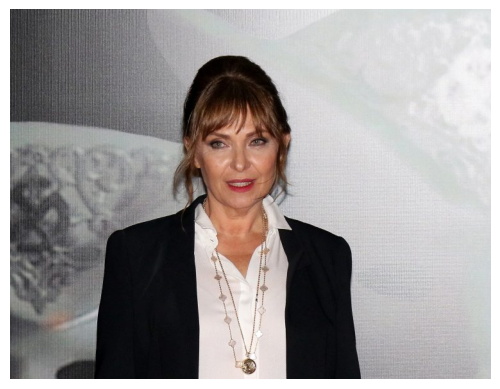

In [23]:
img_path = "/content/drive/MyDrive/Age_Detection/vesna trivalic.jpg"
predict_single_image_readable(model, img_path)

img = mpimg.imread(img_path)
plt.imshow(img)
plt.axis('off')
plt.show()

# Zaključak

U ovom projektu prikazana je implementacija sistema za detekciju starosnih grupa, pola i emocija na slikama ljudi koristeći duboko učenje i konvolucione neuronske mreže (CNN).

Teorijski dio je obuhvatio osnovne principe prepoznavanja obrazaca i karakteristika na slikama, značaj CNN-a i primjenu transfer learning-a kroz model MobileNetV2, koji se pokazao kao efikasan i pogodan za rad sa manjim dataset-ovima.

Analiziran je dobijeni dataset.

Praktični dio obuhvatio je kompletan pipeline: od učitavanja i pripreme podataka, preko kreiranja i treniranja višezadatnog modela, do evaluacije performansi i demonstracije predikcija na pojedinačnim slikama. Rezultati pokazuju da model postiže solidnu tačnost po kategorijama.

Kroz rad na ovom projektu, razvijena je praktična vještina primjene transfer learning-a, rukovanja slikovnim dataset-om, evaluacije performansi modela i interpretacije rezultata. <br> <br> <br>
# Literatura
Materijali koji su korišćeni kao pomoć prilikom izrade projektnog zadataka su:

- Materijali sa vježbi

- https://www.tensorflow.org/tutorials/images/transfer_learning

- https://medium.com/@feitgemel/classifying-images-with-mobilenet-v2-adedfa9eae28

- https://www.youtube.com/watch?v=8LjK4knsTRQ
